In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fn = 'ersst.185401.nc'
ds = nc.Dataset(fn)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.6
    Metadata_Conventions: CF-1.6, Unidata Dataset Discovery v1.0
    metadata_link: C00884
    id: ersst.185401
    naming_authority: gov.noaa.ncdc
    title: NOAA ERSSTv3b (in situ only)
    summary: ERSST.v3b is developped based on Smith and Reynolds 2003
    institution: NOAA/NESDIS/NCEI/CCOG
    creator_name: Boyin Huang
    creator_email: boyin.huang@noaa.gov
    date_modified: 2017/01/27
    production_version: Version 5
    history: Fri Jan 27 08:54:57 2017: ncatted -O -a _FillValue,ssta,o,f,-999.0 ssta.nc
Version 5 based on Version 4
    publisher_name: Boyin Huang
    publisher_email: boyin.huang@noaa.gov
    creator_url: http://www.ncdc.noaa.gov
    license: No constraints on data access or use
    time_coverage_start: 1854-01-15T000000Z
    time_coverage_end: 1854-01-15T000000Z
    geospatial_lon_min: -1.0
    geospatial_lon_max: 359.0
    geospatial_lat_m

In [3]:
import xarray as xr

In [4]:
data = xr.open_dataset('ersst.185401.nc')
print(data)

<xarray.Dataset>
Dimensions:  (lat: 89, lev: 1, lon: 180, time: 1)
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01
Data variables:
    sst      (time, lev, lat, lon) float32 ...
    ssta     (time, lev, lat, lon) float32 ...
Attributes: (12/41)
    Conventions:                CF-1.6
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0
    metadata_link:              C00884
    id:                         ersst.185401
    naming_authority:           gov.noaa.ncdc
    title:                      NOAA ERSSTv3b (in situ only)
    ...                         ...
    instrument:                 Conventional thermometers
    source:                     ICOADS R2.5 SST, NCEP GTS SST, HadISST ice, N...
    comment:                    SSTs were observed by conventional thermome

In [5]:
print(data['sst'])

<xarray.DataArray 'sst' (time: 1, lev: 1, lat: 89, lon: 180)>
array([[[[ nan, ...,  nan],
         ...,
         [-1.8, ..., -1.8]]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01
Attributes:
    long_name:      Extended reconstructed sea surface temperature
    standard_name:  SST
    units:          degree_C
    valid_min:      -3.0
    valid_max:      45.0


In [6]:
import numpy as np
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap

In [7]:
file = 'ersst.185401.nc'
data = Dataset(file,mode='r')
print(type(data))
print(data.variables.keys())

<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['lat', 'lev', 'lon', 'sst', 'time', 'ssta'])


In [8]:
lats = data.variables['lat'][:]
levs = data.variables['lev'][:]
lons = data.variables['lon'][:]
sst = data.variables['sst'][:]
time = data.variables['time'][:]
ssta = data.variables['ssta'][:]

In [9]:
sst

masked_array(
  data=[[[[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [-1.7999999523162842, -1.7999999523162842,
           -1.7999999523162842, ..., -1.7999999523162842,
           -1.7999999523162842, -1.7999999523162842],
          [-1.7999999523162842, -1.7999999523162842,
           -1.7999999523162842, ..., -1.7999999523162842,
           -1.7999999523162842, -1.7999999523162842],
          [-1.7999999523162842, -1.7999999523162842,
           -1.7999999523162842, ..., -1.7999999523162842,
           -1.7999999523162842, -1.7999999523162842]]]],
  mask=[[[[ True,  True,  True, ...,  True,  True,  True],
          [ True,  True,  True, ...,  True,  True,  True],
          [ True,  True,  True, ...,  True,  True,  True],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., Fal

In [10]:
mp = Basemap(projection='mill',
             lat_ts = 10,
             llcrnrlon=np.min(lons),   # lower longitude
             llcrnrlat=np.min(lats),    # lower latitude
             urcrnrlon=np.max(lons),   # uppper longitude
             urcrnrlat=np.max(lats),   # uppper latitude
            resolution = 'i')

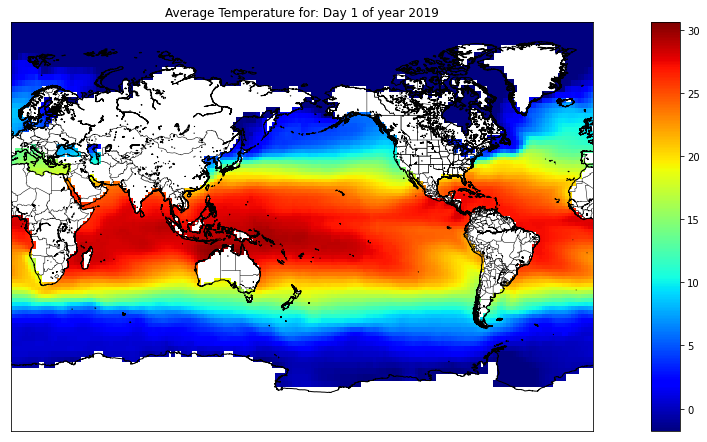

In [11]:
lon,lat = np.meshgrid(lons,lats)
x,y = mp(lon,lat)

plt.figure(figsize=(12,9))
c_schemes = mp.pcolor(x,y,np.squeeze(sst[0,:,:]),cmap = 'jet') # [0,:,:] is for the first day of the year)
# consider this as the outline for the map that is to be created 
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_schemes,location='right',pad = '10%') # map information
plt.title('Average Temperature for: Day 1 of year 2019')
plt.show()

In [12]:
lats = data.variables['lat'][:]
levs = data.variables['lev'][:]
lons = data.variables['lon'][:]
sst = data.variables['sst'][:]
time = data.variables['time'][:]
ssta = data.variables['ssta'][:]

lon,lat = np.meshgrid(lons,lats)
x,y = mp(lon,lat)

lon.min() , lon.max() , lat.min() , lat.max()

(0.0, 358.0, -88.0, 88.0)

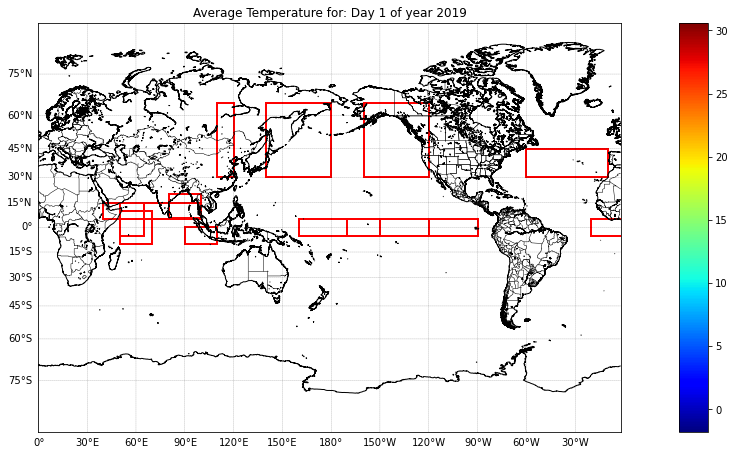

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Rectangle

# Sample data (replace these with your actual data)
lats = data.variables['lat'][:]
levs = data.variables['lev'][:]
lons = data.variables['lon'][:]
sst = data.variables['sst'][:]
time = data.variables['time'][:]
ssta = data.variables['ssta'][:]
sst = sst[0, 0]

lon,lat = np.meshgrid(lons,lats)

# Define the coordinates of the oceanic regions
oceanic_regions = [
    [(340, 5), (360, -5)],     # (lon_start, lat_start), (lon_end, lat_end)
    [(80, 6), (100, 20)],
    [(50, -10), (70, 10)],
    [(90, -10), (110, 0)],
    [(210, -5), (270, 5)],
    [(190, -5), (240, 5)],
    [(160, -5), (210, 5)],
    [(300, 30), (350, 45)],
    [(140, 30), (180, 65)],
    [(200, 30), (240, 65)],
    [(110, 30), (120, 65)],
    [(40, 5), (100, 15)],
    [(50, -5), (65, 15)],
]

# Create a Basemap object with specified extent
mp = Basemap(projection='mill',
             lat_ts = 10,
             llcrnrlon=np.min(lons),   # lower longitude
             llcrnrlat=np.min(lats),    # lower latitude
             urcrnrlon=np.max(lons),   # uppper longitude
             urcrnrlat=np.max(lats),   # uppper latitude
            resolution = 'i')

x, y = mp(lon, lat)

plt.figure(figsize=(12, 9))
# Use imshow instead of pcolor
c_schemes = plt.imshow(sst, extent=[0.0, 358.0, -88.0, 88.0], cmap='jet', origin='lower')

mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

# Plot the oceanic regions as rectangles
for region in oceanic_regions:
    lon_start, lat_start = region[0]
    lon_end, lat_end = region[1]
    x_start, y_start = mp(lon_start, lat_start)
    x_end, y_end = mp(lon_end, lat_end)
    width = x_end - x_start
    height = y_end - y_start
    rectangle = Rectangle((x_start, y_start), width, height, fill=False, edgecolor='red', linewidth=2)
    plt.gca().add_patch(rectangle)

cbar = mp.colorbar(c_schemes, location='right', pad='10%')
plt.title('Average Temperature for: Day 1 of year 2019')

# Adding longitude and latitude annotations
step_lon = 30  # Longitude annotation step size (change as desired)
step_lat = 15  # Latitude annotation step size (change as desired)

parallels = np.arange(-90., 91., step_lat)
meridians = np.arange(-180., 181., step_lon)

mp.drawparallels(parallels, labels=[True, False, False, False], linewidth=0.2)
mp.drawmeridians(meridians, labels=[False, False, False, True], linewidth=0.2)

plt.show()


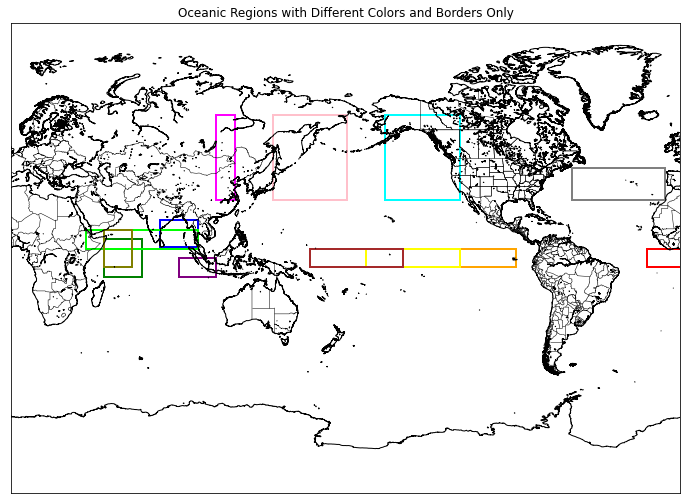

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Rectangle

# Sample data (replace these with your actual data)
lats = data.variables['lat'][:]
levs = data.variables['lev'][:]
lons = data.variables['lon'][:]
sst = data.variables['sst'][:]
time = data.variables['time'][:]
ssta = data.variables['ssta'][:]
sst = sst[0, 0]

lon, lat = np.meshgrid(lons, lats)

# Define the coordinates of the oceanic regions
oceanic_regions = [
    [(340, 5), (360, -5)],     # (lon_start, lat_start), (lon_end, lat_end)
    [(80, 6), (100, 20)],
    [(50, -10), (70, 10)],
    [(90, -10), (110, 0)],
    [(210, -5), (270, 5)],
    [(190, -5), (240, 5)],
    [(160, -5), (210, 5)],
    [(300, 30), (350, 45)],
    [(140, 30), (180, 65)],
    [(200, 30), (240, 65)],
    [(110, 30), (120, 65)],
    [(40, 5), (100, 15)],
    [(50, -5), (65, 15)],
]

# Create a Basemap object with specified extent
mp = Basemap(projection='mill',
             lat_ts=10,
             llcrnrlon=np.min(lons),   # lower longitude
             llcrnrlat=np.min(lats),   # lower latitude
             urcrnrlon=np.max(lons),   # upper longitude
             urcrnrlat=np.max(lats),   # upper latitude
             resolution='i')

x, y = mp(lon, lat)

plt.figure(figsize=(12, 9))

mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

# Plot the oceanic regions as rectangles with different colors and only borders
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'brown', 'gray', 'pink', 'cyan', 'magenta', 'lime', 'olive']
for i, region in enumerate(oceanic_regions):
    lon_start, lat_start = region[0]
    lon_end, lat_end = region[1]
    x_start, y_start = mp(lon_start, lat_start)
    x_end, y_end = mp(lon_end, lat_end)
    width = x_end - x_start
    height = y_end - y_start
    rectangle = Rectangle((x_start, y_start), width, height, fill=False, edgecolor=colors[i], linewidth=2)
    plt.gca().add_patch(rectangle)

# Adding longitude and latitude annotations
step_lon = 30  # Longitude annotation step size (change as desired)
step_lat = 15  # Latitude annotation step size (change as desired)

parallels = np.arange(-90., 91., step_lat)
meridians = np.arange(-180., 181., step_lon)

mp.drawparallels(parallels, labels=[True, False, False, False], linewidth=0.2)
mp.drawmeridians(meridians, labels=[False, False, False, True], linewidth=0.2)

plt.title('Oceanic Regions with Different Colors and Borders Only')

plt.show()
